**First Part of Agent Automation Project**
consists of:
 1. Data preprocessing 
 2. Exploratory Analysis 
 3. Feature Enginerring 
 4. Text clustering 
 5. Working on the strategy Development for the Challenge, and dividing roles to make the workflow more efficient
 6. Saving clusters to a file 




**Importing libraries **

In [ ]:
# down forget to upload abcd file to the source file in here, chose 'upload the session storage' *
# and download abcd file to your computer, it is right in the folder too *

import json
import pandas as pd
from pandas import json_normalize
import tensorflow as tf 

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

import os
import pandas as pd
!pip install -U sentence-transformers
from sentence_transformers import SentenceTransformer
embedder = SentenceTransformer('distilbert-base-nli-mean-tokens')

import re
!pip install preprocessor
import preprocessor as p

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from wordcloud import WordCloud

!pip install tweet-preprocessor
import preprocessor as p


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 4.2 MB/s 
     |████████████████████████████████| 5.8 MB 60.6 MB/s 
     |████████████████████████████████| 1.3 MB 87.0 MB/s 
     |████████████████████████████████| 182 kB 94.5 MB/s 
     |████████████████████████████████| 7.6 MB 81.3 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=3839bc632aa1c40d227b32595c19c9a9c741634e5f5d67baa7dcedd15a4ecc62
  Stored in directory: /root/.cache/pip/wheels/5e/6f/8c/d88aec621f3f542d26fac0342bef5e693335d125f4e54aeffe
Successfully built sentence-transformers


Downloading:   0%|          | 0.00/690 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.99k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/550 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/265M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/450 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for preprocessor: filename=preprocessor-1.1.3-py3-none-any.whl size=4476 sha256=345934173296cd6318df12ddf742f779e13f33a5643a173230cb49fbfd548dba
  Stored in directory: /root/.cache/pip/wheels/e4/4e/bf/0ecf68aa10ee89d684d90437bd9f89ac19d5dc2921988bb59d
Successfully built preprocessor
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Loading and opening data file with json.loads and creating a dataframe 

In [ ]:
with open('abcd.json','r') as f:
 data = json.loads(f.read())

In [ ]:
data_train = data['train']
data_dev = data['dev']
data_test = data['test']


In [ ]:
df_3= pd.json_normalize(data_train, record_path=['delexed'], meta = [['convo_id'],['scenario','personal'],['scenario','order'],['scenario','product'],['scenario','flow'],['scenario','subflow']])

In [ ]:
df_3.columns
df_3.shape[0] 

176434

In [ ]:
df_3.isna().sum()

speaker              0
text                 0
turn_count           0
targets              0
candidates           0
convo_id             0
scenario.personal    0
scenario.order       0
scenario.product     0
scenario.flow        0
scenario.subflow     0
dtype: int64

In [ ]:
#df_20 = df_train.sample(n = 35286, random_state = 2)
#df_20 = df_20.sample(n = 5000, random_state = 5)
#df_20.sample(frac=0.2, replace=True, random_state=1)
#correlation matrix 

Dropping the less important features 

In [ ]:
colnames_to_drop = ['turn_count','targets', 'candidates', 'scenario.order', 'scenario.product', 'scenario.personal','convo_id'] 
df3 = pd.DataFrame(df_3.drop(colnames_to_drop, axis=1))


Updating the frame 

In [ ]:
df3

,speaker,text,scenario.flow,scenario.subflow
0,agent,hi!,product_defect,return_size
1,agent,how can i help you?,product_defect,return_size
2,customer,"hi! i need to return an item, can you help me ...",product_defect,return_size
3,agent,"sure, may i have your name please?",product_defect,return_size
4,customer,crystal minh,product_defect,return_size
...,...,...,...,...
176429,customer,ok that seemed to be the problem,troubleshoot_site,search_results
176430,customer,thank you,troubleshoot_site,search_results
176431,agent,is there anything else i can help with today,troubleshoot_site,search_results
176432,customer,that is all,troubleshoot_site,search_results


**Feature Engineering Part**. Extracting and separating specifically text for agent and custumer. (creating 2 new datframes with extratced texta nd then mering it using function merge and parameter how='inner' )

In [ ]:
#df_20
#colnames_to_drop = ['turn_count','targets', 'candidates', 'scenario.order', 'scenario.product', 'scenario.personal','scenario.subflow'] 
#df3 = pd.DataFrame(df_20.drop(colnames_to_drop, axis=1))
df3 = df3.rename(columns={'scenario.flow':"category"})
df3 = df3.rename(columns={'scenario.subflow':"sub-category"})

In [ ]:
df_agent = df3[df3['speaker'] == 'agent']
df_agent
df_customer = df3[df3['speaker'] == 'customer']
df_customer

sorted_df =pd.DataFrame(columns = ['df_agent'])
#cluster_df = pd.DataFrame(corpus, columns = ['cleaned_text_of_agent_for_clusters'])



In [ ]:
df_agent.reset_index(drop=True, inplace=True) #reset the index
df_customer.reset_index(drop=True, inplace=True)
df_merged = pd.merge( df_agent, df_customer, left_index=True, right_index=True, how='inner', suffixes=('_agent', '_customer'))
df_merged.head(4)

,speaker_agent,text_agent,category_agent,sub-category_agent,speaker_customer,text_customer,category_customer,sub-category_customer
0,agent,hi!,product_defect,return_size,customer,"hi! i need to return an item, can you help me ...",product_defect,return_size
1,agent,how can i help you?,product_defect,return_size,customer,crystal minh,product_defect,return_size
2,agent,"sure, may i have your name please?",product_defect,return_size,customer,i got the wrong size.,product_defect,return_size
3,agent,"thanks, may i ask the reason for the return?",product_defect,return_size,customer,username: <username>,product_defect,return_size


In [ ]:
df_merged.isna().sum()

speaker_agent            0
text_agent               0
category_agent           0
sub-category_agent       0
speaker_customer         0
text_customer            0
category_customer        0
sub-category_customer    0
dtype: int64

In [ ]:
# renaming columns flow to the 'category'


df_merged

colnames_to_drop = ['category_customer','sub-category_customer','speaker_agent'] 
df_merged = pd.DataFrame(df_merged.drop(colnames_to_drop, axis=1))

In [ ]:
df_merged.isna().sum()

text_agent            0
category_agent        0
sub-category_agent    0
speaker_customer      0
text_customer         0
dtype: int64

In [ ]:
#new df
df = pd.DataFrame(df_merged, columns = ['cleaned_text_of_agent_for_clusters'])

In [ ]:
df_merged.dtypes

text_agent            object
category_agent        object
sub-category_agent    object
speaker_customer      object
text_customer         object
dtype: object

In [ ]:
# Shuffel the dataset to make sure we get an equal distribution of the data before splitting into train and test sets
#dataset = df.sample(frac=1)
#dataset.head(4)
colnames_to_drop = ['turn_count','targets', 'candidates', 'scenario.order', 'scenario.product', 'scenario.personal','convo_id'] 
df3 = pd.DataFrame(df_3.drop(colnames_to_drop, axis=1))

In [ ]:
sorted = df_merged.groupby('category_agent')
# Let's print the first entries
# in all the groups formed.
sorted.first()

,text_agent,sub-category_agent,speaker_customer,text_customer
category_agent,,,,
account_access,hello how can i help you today?,recover_username,customer,"hello, i am trying to check the status of my o..."
manage_account,thanks for choosing acmebrands! what can i do ...,status_credit_missing,customer,sure. it is alessandro phoenix and my acct id...
order_issue,hi! how can i help you today?,status_quantity,customer,thank you!
product_defect,hi!,return_size,customer,"hi! i need to return an item, can you help me ..."
purchase_dispute,"good afternoon, how can i help you?",mistimed_billing_already_returned,customer,"all right, thanks for your help"
shipping_issue,welcome to acmebrands! how can i help you?,manage,customer,yes my order id is <order_id>
single_item_query,"hello, it is not dry clean only. we use high q...",jacket_how_2,customer,"it says ""in transit"
storewide_query,"good afternoon, how can i help you?",timing_4,customer,how much long till it is refunded
subscription_inquiry,hello! how can i help you today?,manage_extension,customer,i want an extension for my shopping service.


**Visualizing most popular categories for the angent workflow with seaborn**

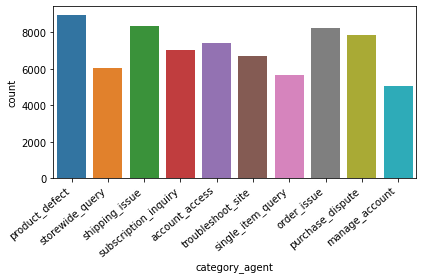

In [ ]:
import seaborn as sns
ax = sns.countplot(x="category_agent", data=df_merged)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()



**Clustering Part**. Data preprocesing 

Cleaning the data 

In [ ]:
# custum function to clean the dataset (combining tweet_preprocessor and reguar expression)
def clean_text(df4):
    #set up punctuations we want to be replaced
    REPLACE_NO_SPACE = re.compile("(\.)|(\;)|(\:)|(\!)|(\')|(\?)|(\,)|(\")|(\|)|(\()|(\))|(\[)|(\])|(\%)|(\$)|(\>)|(\<)|(\{)|(\})")
    REPLACE_WITH_SPACE = re.compile("(<br\s/><br\s/?)|(-)|(/)|(:).")
    tempArr = []
    for line in df4:
        # send to tweet_processor
        tmpL = p.clean(line)
        # remove puctuation
        tmpL = REPLACE_NO_SPACE.sub("", tmpL.lower()) # convert all tweets to lower cases
        tmpL = REPLACE_WITH_SPACE.sub(" ", tmpL)
        tempArr.append(tmpL)
    return tempArr

In [ ]:
# Cleaning text for Agent 

import preprocessor.api as p
from preprocessor.api import clean, tokenize, parse

# cleaning the text
df_merged['clean _text_agent'] = clean_text(df_merged['text_agent'])


df_merged.head()
#fix teh dataframe, so the column can match 

,text_agent,category_agent,sub-category_agent,speaker_customer,text_customer,clean _text_agent
0,hi!,product_defect,return_size,customer,"hi! i need to return an item, can you help me ...",hi
1,how can i help you?,product_defect,return_size,customer,crystal minh,how can i help you
2,"sure, may i have your name please?",product_defect,return_size,customer,i got the wrong size.,sure may i have your name please
3,"thanks, may i ask the reason for the return?",product_defect,return_size,customer,username: <username>,thanks may i ask the reason for the return
4,"ok, may i have your username, email address an...",product_defect,return_size,customer,<email>,ok may i have your username email address and ...


In [ ]:
corpus = list(df_merged['clean _text_agent'])

corpus = corpus[0:10000]

#500 corpus id clean text of an agent 

# not enough of examples 

In [ ]:
#cluster all the date 1k
#jupyter

In [ ]:
corpus_embeddings = embedder.encode(corpus)

In [ ]:
num_clusters = 435
clustering_model = KMeans(n_clusters=num_clusters)
clustering_model.fit(corpus_embeddings)
cluster_assignment = clustering_model.labels_

In [ ]:
cluster_df = pd.DataFrame(corpus, columns = ['cleaned_text_of_agent_for_clusters'])
cluster_df['cluster_for_agent'] = cluster_assignment
cluster_df.head()

,cleaned_text_of_agent_for_clusters,cluster_for_agent
0,hi,317
1,how can i help you,12
2,sure may i have your name please,142
3,thanks may i ask the reason for the return,163
4,ok may i have your username email address and ...,85


In [ ]:
cluster_df.value_counts

<bound method DataFrame.value_counts of                      cleaned_text_of_agent_for_clusters  cluster_for_agent
0                                                    hi                317
1                                    how can i help you                 12
2                      sure may i have your name please                142
3            thanks may i ask the reason for the return                163
4     ok may i have your username email address and ...                 85
...                                                 ...                ...
9995       thank you i was able to pull up your account                359
9996  this is the standard shipping cost so would yo...                108
9997  was there a specific action your would like to...                 86
9998  such as downgrading or seeing if we can offer ...                156
9999  alright could you provide me with your usernam...                 85

[10000 rows x 2 columns]>

In [ ]:
#take 500 values of the whole df
#df_500 = df_merged.head(500)

In [ ]:
#take all values 
df = df_merged

In [ ]:
#merge cluster df and our df
df = pd.merge( df, cluster_df, left_index=True, right_index=True, how='inner', suffixes=('_agent', '_customer'))
df.head(5)


,text_agent,category_agent,sub-category_agent,speaker_customer,text_customer,clean _text_agent,cleaned_text_of_agent_for_clusters,cluster_for_agent
0,hi!,product_defect,return_size,customer,"hi! i need to return an item, can you help me ...",hi,hi,317
1,how can i help you?,product_defect,return_size,customer,crystal minh,how can i help you,how can i help you,12
2,"sure, may i have your name please?",product_defect,return_size,customer,i got the wrong size.,sure may i have your name please,sure may i have your name please,142
3,"thanks, may i ask the reason for the return?",product_defect,return_size,customer,username: <username>,thanks may i ask the reason for the return,thanks may i ask the reason for the return,163
4,"ok, may i have your username, email address an...",product_defect,return_size,customer,<email>,ok may i have your username email address and ...,ok may i have your username email address and ...,85


In [ ]:
df['clean_text_agent_corpus'] = clean_text(df['text_agent'])
df.head()

,text_agent,category_agent,sub-category_agent,speaker_customer,text_customer,clean _text_agent,cleaned_text_of_agent_for_clusters,cluster_for_agent,clean_text_agent_corpus
0,hi!,product_defect,return_size,customer,"hi! i need to return an item, can you help me ...",hi,hi,317,hi
1,how can i help you?,product_defect,return_size,customer,crystal minh,how can i help you,how can i help you,12,how can i help you
2,"sure, may i have your name please?",product_defect,return_size,customer,i got the wrong size.,sure may i have your name please,sure may i have your name please,142,sure may i have your name please
3,"thanks, may i ask the reason for the return?",product_defect,return_size,customer,username: <username>,thanks may i ask the reason for the return,thanks may i ask the reason for the return,163,thanks may i ask the reason for the return
4,"ok, may i have your username, email address an...",product_defect,return_size,customer,<email>,ok may i have your username email address and ...,ok may i have your username email address and ...,85,ok may i have your username email address and ...


In [ ]:
csv_data = df.to_csv()

In [ ]:
#convert and chck all the variables 
df.dtypes


#df5['cluster_for_agent']=df5['cluster_for_agent'].astype('int')

text_agent                            object
category_agent                        object
sub-category_agent                    object
speaker_customer                      object
text_customer                         object
clean _text_agent                     object
cleaned_text_of_agent_for_clusters    object
cluster_for_agent                      int32
clean_text_agent_corpus               object
dtype: object

In [ ]:
df.isna().sum()


text_agent                            0
category_agent                        0
sub-category_agent                    0
speaker_customer                      0
text_customer                         0
clean _text_agent                     0
cleaned_text_of_agent_for_clusters    0
cluster_for_agent                     0
clean_text_agent_corpus               0
dtype: int64

**Saving the resulted clusters to a file **

In [ ]:
with open('csv_data.txt', 'w') as csv_file:
    df.to_csv(path_or_buf=csv_file)

**Strategy Development for the Challenge, and dividing roles to make the workflow more efficient**

**Strategy Development**

In [ ]:
#1) Data prep - Jacquie (try both methods, and see what works best in your opinion) 
#2) lg - Albina  (build lg  model and properly classify custumer sentences based on cluster) 
#-----------
#3 confusion matrix - Kelly (model evaluation)  
#4 picking 3 sentences from cluster - Samihah/Alaysia + Kelly  
#4 (imagine you have a model that let's say classified custumer sentence by 54, pick top 3 sentences from the cluster 54, 
#4  as an option use cosine similarity)
# *Final presentation Dec 16 early time or evening time -  submit the time via email ( Done+ )
# -------
# gtp-2 (easy, we can try that later; feed the data to the model and generate the text base on it, find a metrics )